<a href="https://colab.research.google.com/github/apeksha309/FDS_LabWork/blob/main/FDS_JOURNAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sampling Distribution**

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

In [8]:
LOANS_INCOME_CSV =pd.read_csv('/content/drive/MyDrive/loans_income.csv')

In [9]:
LOANS_INCOME_CSV

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [11]:
loans_income = pd.read_csv('/content/drive/MyDrive/loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
27094   82000.0  Data
42320   58000.0  Data
866    105000.0  Data
27674   98000.0  Data
21583  170000.0  Data


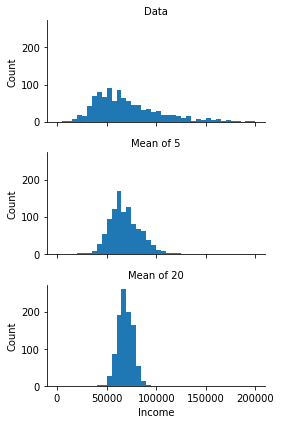

In [12]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# ****Bootstrap****

In [13]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -65.41350000000239
std. error: 195.41049621189876


# **Central Limit Theorem**

In [14]:
import numpy as np
import random

3.9835395408087866


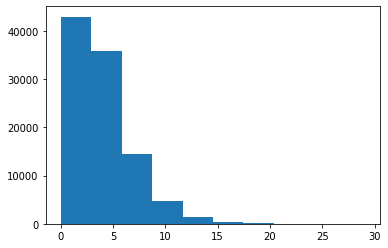

In [15]:
# Create a parent distribution, from the gamma family
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000)
print(np.mean(s))
import matplotlib.pyplot as plt
import scipy.special as sps
plt.hist(s)
plt.show()

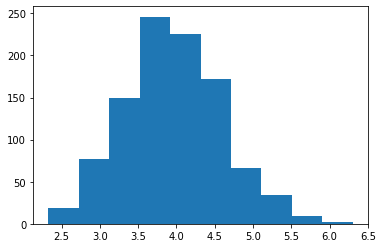

In [16]:
# The distribution of the means from the sampled groups is normally distributed
samples = [ np.mean(random.choices(s, k=20)) for _ in range(1000) ]
plt.hist(samples)
plt.show()

# **The Law of Large Numbers**

In [17]:
#The law of large numbers states that as a sample size increases, the sample mean will get closer to the population mean. 
#Let’s check this with our example.

#Below is an array that represents the puppies we have in our sample, where 1 
#represents the puppies with blue eyes, and 0 represents the puppies with hazel eyes.

np.random.seed(42)

puppies = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1])


#Let's generate one more sample of size 100.
np.random.choice(puppies, 100, replace=True)


hundred_sample_props= []
for i in range(10000):
    sample = np.random.choice(puppies, 100, replace=True)
    hundred_sample_props.append(sample.mean())
hundred_sample_props = np.array(hundred_sample_props)

np.random.choice(puppies, 5, replace=True).mean()
np.random.choice(puppies, 20, replace=True).mean()
np.random.choice(puppies, 100, replace=True).mean()

0.8

# **Plotting Estimates (Mean and Standard Deviation)**

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Make the dataframe for evaluation on Errorbars 
df = pd.DataFrame({ 
    'insert': [0.0, 0.1, 0.3, 0.5, 1.0], 
    'mean': [0.009905, 0.45019, 0.376818, 0.801856, 0.643859], 
    'quality': ['good', 'good', 'poor', 'good', 'poor'],  
    'std': [0.003662, 0.281895, 0.306806, 0.243288, 0.322378]}) 
  
print(df)

   insert      mean quality       std
0     0.0  0.009905    good  0.003662
1     0.1  0.450190    good  0.281895
2     0.3  0.376818    poor  0.306806
3     0.5  0.801856    good  0.243288
4     1.0  0.643859    poor  0.322378


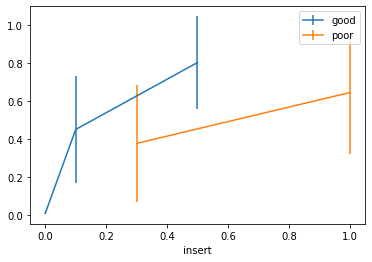

In [20]:
#Subplots as having two types of quality 
fig, ax = plt.subplots() 
  
for key, group in df.groupby('quality'): 
    group.plot('insert', 'mean', yerr='std',  
               label=key, ax=ax) 
plt.show()

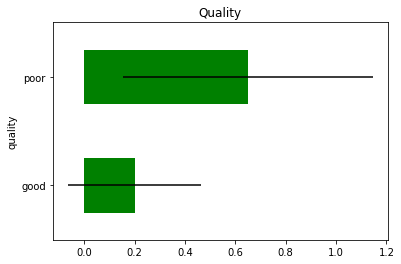

In [21]:
# Groupby the quality column using aggreate 
# value of mean and std 
qual = df.groupby("quality").agg([np.mean, np.std]) 
qual = qual['insert'] 
qual.plot(kind = "barh", y = "mean", legend = False, 
		xerr = "std", title = "Quality", color='green')

# **Defining Confidence Interval**

68760.51844
55734.1


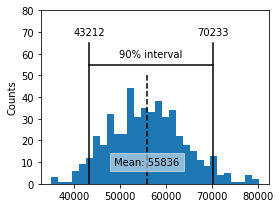

In [22]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

# **Inferential Statistics**

1. Calculating Expected Parameters (Mean and
Standard Deviation)


In [24]:
data=pd.read_csv('/content/drive/MyDrive/loans_income.csv')

In [25]:
# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(data)
sample_stdev = np.std(data)
print("mean",sample_mean)
print("standard deviation",sample_stdev)

mean x    68760.51844
dtype: float64
standard deviation x    32871.706648
dtype: float64
